# About the Data

The dataset contains information for 50 start up companies. The goal is to calculate profit of a start up company after fitting the training data to the model.

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

## Importing Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience_Portfolio/50_Startups.csv')
dataNames=df.columns[:-1]
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Splitting Data into X and Y values

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Hot Encoding State Variable

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Splitting Data into X and Y

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=0)

# Creating Model and Prediction

## Creating Model

In [ ]:
lr = LinearRegression()
lr.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making Predictions

In [ ]:
np.set_printoptions(precision=2)
yPred = lr.predict(xTest)

## Plotting Results

In [ ]:
# Preparing Final Dataframe with predicted results with xTest
finalDF = pd.DataFrame(yTest)
finalDF['Predicted_Profit']=yPred
finalDF

,Profit,Predicted_Profit
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [ ]:
# Obtaining slope and intercept
coef=lr.coef_
print('The coefficients are ' + str(coef))

intercept=lr.intercept_
print('The y intercepts is: ' + str(intercept))

rSquared = r2_score(y_true=yTest,y_pred=yPred)
print('The rSquared value is: ' + str(rSquared))

The coefficients are [ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
The y intercepts is: 42467.52924853204
The rSquared value is: 0.9347068473282515


Text(80000, 175000, 'r_squared=0.93')

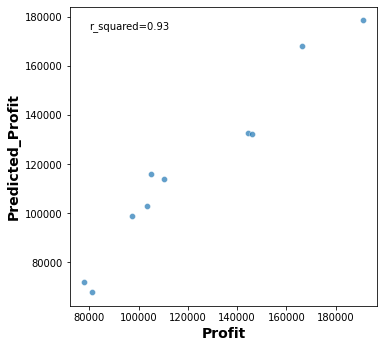

In [ ]:
# Plotting Data
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x='Profit',y='Predicted_Profit',data=finalDF,alpha=0.7)
plt.xlabel('Profit',fontsize=14,fontweight='bold')
plt.ylabel('Predicted_Profit',fontsize=14,fontweight='bold')
plt.text(80000,175000,'r_squared={:.2f}'.format(rSquared))
#plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

# Profit prediction for startup

Using the fitted model, we can predict the profits for a single start up company that has the following information


* State: New York (encoded as 1,0,0)
* Administration Costs: 160,000
* Marketing Costs: 130,000
* R&D Costs: 300,000








In [ ]:
print('Profit Prediction: %s' % (lr.predict([[1,0,0,160000,130000,300000]])))

Profit Prediction: [181566.92]
